In [141]:
import pandas as pd
import numpy as np

In [142]:
weather_energy = pd.read_csv('final.csv')
weather_energy.set_index('day',inplace=True)
weather_energy.shape

(827, 15)

In [143]:
weather_energy.head()

,avg_energy,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,moon_illumination,WindGustKmph,cloudcover,humidity,precipMM,pressure,visibility,winddirDegree,IsBankHoliday
day,,,,,,,,,,,,,,,
2011-11-23,6.952692,10.0,5.0,0.0,8.7,2.0,16.0,18.0,25.0,90.0,0.0,1027,7.0,257,0
2011-11-24,8.536480,13.0,8.0,0.0,8.7,3.0,9.0,30.0,45.0,92.0,0.0,1028,10.0,205,0
2011-11-25,9.499781,12.0,7.0,0.0,8.7,2.0,2.0,31.0,44.0,87.0,0.2,1024,9.0,240,0
2011-11-26,10.267707,12.0,6.0,0.0,8.2,3.0,5.0,35.0,30.0,90.0,0.0,1026,10.0,229,1
2011-11-27,10.850805,12.0,6.0,0.0,6.8,3.0,11.0,36.0,38.0,85.0,0.3,1021,10.0,258,1


In [144]:
#function to convert time series data to apply supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    
	"""
	Frame a time series as a supervised learning dataset.
	Arguments:
		data: Sequence of observations as a list or NumPy array.
		n_in: Number of lag observations as input (X).
		n_out: Number of observations as output (y).
		dropnan: Boolean whether or not to drop rows with NaN values.
	Returns:
		Pandas DataFrame of series framed for supervised learning.
	"""
	n_vars = 1 if type(data) is list else data.shape[1]
	df = pd.DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = pd.concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

In [145]:
from sklearn.preprocessing import MinMaxScaler

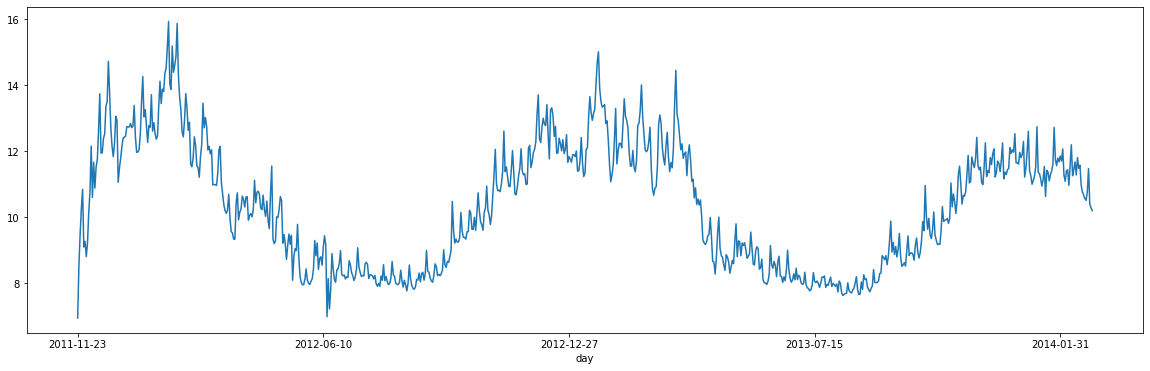

In [146]:
weather_energy["avg_energy"].plot(figsize=(20,6));


In [147]:
weather_energy.shape

(827, 15)

In [148]:
weather_energy.head()

,avg_energy,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,moon_illumination,WindGustKmph,cloudcover,humidity,precipMM,pressure,visibility,winddirDegree,IsBankHoliday
day,,,,,,,,,,,,,,,
2011-11-23,6.952692,10.0,5.0,0.0,8.7,2.0,16.0,18.0,25.0,90.0,0.0,1027,7.0,257,0
2011-11-24,8.536480,13.0,8.0,0.0,8.7,3.0,9.0,30.0,45.0,92.0,0.0,1028,10.0,205,0
2011-11-25,9.499781,12.0,7.0,0.0,8.7,2.0,2.0,31.0,44.0,87.0,0.2,1024,9.0,240,0
2011-11-26,10.267707,12.0,6.0,0.0,8.2,3.0,5.0,35.0,30.0,90.0,0.0,1026,10.0,229,1
2011-11-27,10.850805,12.0,6.0,0.0,6.8,3.0,11.0,36.0,38.0,85.0,0.3,1021,10.0,258,1


In [149]:
no_of_timesteps=6
no_of_timesteps_lead=2
reframed = series_to_supervised(weather_energy.values, no_of_timesteps,no_of_timesteps_lead)
reframed

,var1(t-6),var2(t-6),var3(t-6),var4(t-6),var5(t-6),var6(t-6),var7(t-6),var8(t-6),var9(t-6),var10(t-6),...,var6(t+1),var7(t+1),var8(t+1),var9(t+1),var10(t+1),var11(t+1),var12(t+1),var13(t+1),var14(t+1),var15(t+1)
6,6.952692,10.0,5.0,0.0,8.7,2.0,16.0,18.0,25.0,90.0,...,2.0,32.0,32.0,33.0,85.0,0.00,1019.0,10.0,205.0,0.0
7,8.536480,13.0,8.0,0.0,8.7,3.0,9.0,30.0,45.0,92.0,...,2.0,39.0,25.0,78.0,90.0,7.25,1007.0,9.0,143.0,0.0
8,9.499781,12.0,7.0,0.0,8.7,2.0,2.0,31.0,44.0,87.0,...,2.0,45.0,21.0,35.0,91.0,7.25,1012.0,9.0,254.0,0.0
9,10.267707,12.0,6.0,0.0,8.2,3.0,5.0,35.0,30.0,90.0,...,2.0,52.0,36.0,60.0,91.0,7.25,1004.0,9.0,240.0,1.0
10,10.850805,12.0,6.0,0.0,6.8,3.0,11.0,36.0,38.0,85.0,...,2.0,59.0,30.0,67.0,92.0,0.60,1001.0,10.0,246.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
821,11.490470,10.0,4.0,0.0,10.0,2.0,96.0,48.5,36.0,83.0,...,3.0,48.0,32.0,27.0,84.0,0.00,1009.0,10.0,223.0,1.0
822,11.582159,9.0,1.0,0.0,10.1,3.0,89.0,25.0,19.0,86.0,...,2.0,42.0,44.0,66.0,91.0,0.30,1011.0,9.0,186.0,1.0
823,10.979566,10.0,4.0,0.0,5.0,2.0,82.0,30.0,70.0,90.0,...,2.0,35.0,35.0,44.0,85.0,0.10,1006.0,10.0,175.0,0.0
824,10.781898,10.0,5.0,0.0,6.7,2.0,76.0,25.0,81.0,94.0,...,2.0,28.0,34.0,54.0,87.0,1.10,1001.0,9.0,186.0,0.0


In [150]:
# drop columns we don't want to predict
we_le = len(weather_energy.columns)
col_array=np.arange(0,len(reframed.columns))
reframed=reframed.loc[:,(col_array<we_le*no_of_timesteps+we_le) | (col_array%(we_le)==0)]


In [151]:
reframed = reframed.reset_index(drop=True)
reframed

,var1(t-6),var2(t-6),var3(t-6),var4(t-6),var5(t-6),var6(t-6),var7(t-6),var8(t-6),var9(t-6),var10(t-6),...,var7(t),var8(t),var9(t),var10(t),var11(t),var12(t),var13(t),var14(t),var15(t),var1(t+1)
0,6.952692,10.0,5.0,0.0,8.7,2.0,16.0,18.0,25.0,90.0,...,25.0,40.0,80.0,90.0,0.50,1010.0,9.0,205.0,0.0,8.813513
1,8.536480,13.0,8.0,0.0,8.7,3.0,9.0,30.0,45.0,92.0,...,32.0,32.0,33.0,85.0,0.00,1019.0,10.0,205.0,0.0,9.227707
2,9.499781,12.0,7.0,0.0,8.7,2.0,2.0,31.0,44.0,87.0,...,39.0,25.0,78.0,90.0,7.25,1007.0,9.0,143.0,0.0,10.145910
3,10.267707,12.0,6.0,0.0,8.2,3.0,5.0,35.0,30.0,90.0,...,45.0,21.0,35.0,91.0,7.25,1012.0,9.0,254.0,0.0,10.780273
4,10.850805,12.0,6.0,0.0,6.8,3.0,11.0,36.0,38.0,85.0,...,52.0,36.0,60.0,91.0,7.25,1004.0,9.0,240.0,1.0,12.163127
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
815,11.490470,10.0,4.0,0.0,10.0,2.0,96.0,48.5,36.0,83.0,...,55.0,32.0,33.0,85.0,0.20,1003.0,9.0,228.0,0.0,10.776242
816,11.582159,9.0,1.0,0.0,10.1,3.0,89.0,25.0,19.0,86.0,...,48.0,32.0,27.0,84.0,0.00,1009.0,10.0,223.0,1.0,11.480411
817,10.979566,10.0,4.0,0.0,5.0,2.0,82.0,30.0,70.0,90.0,...,42.0,44.0,66.0,91.0,0.30,1011.0,9.0,186.0,1.0,10.411403
818,10.781898,10.0,5.0,0.0,6.7,2.0,76.0,25.0,81.0,94.0,...,35.0,35.0,44.0,85.0,0.10,1006.0,10.0,175.0,0.0,10.294997


In [152]:
n_train_time = 454; # hours used for training.....
original_n_train_time=n_train_time;
pred_list=[]; #predicted values that will replace the original test_y values
testing_rows=365;
#testing_rows=reframed.shape[0]-original_n_train_time-1
test1 = reframed.values[n_train_time:n_train_time+testing_rows, :] #original testing data, this will later be modified with the predicted data generated by for loop
test_y1 = test1[:, -1] #see comment in above line
batch_size_fit=1
train = reframed.values[:n_train_time, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test1[:, :-1], test1[:, -1]
# reshape input to be 3D [samples, timesteps, features]


In [153]:
train_X[1].shape

(105,)

In [154]:
scaler = MinMaxScaler(feature_range=(0, 1))
train_X = scaler.fit_transform(train_X)
train_X = train_X.reshape((train_X.shape[0], no_of_timesteps+1, we_le))

print(train_X.shape)

(454, 7, 15)


In [155]:
import keras
from keras.layers import Dense
from keras.models import Sequential
#from keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD 
from keras.callbacks import EarlyStopping
from keras.utils import np_utils
import itertools
from keras.layers import LSTM,GRU,Bidirectional
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import Dropout
from pandas import concat
import matplotlib.dates as md

In [156]:
#Create and fit the LSTM model

model = Sequential()

model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# fit network
history = model.fit(train_X, train_y, epochs=20, batch_size=batch_size_fit, verbose=2, shuffle=True)


Epoch 1/20
454/454 - 3s - loss: 11.1382
Epoch 2/20
454/454 - 1s - loss: 0.7523
Epoch 3/20
454/454 - 1s - loss: 0.5709
Epoch 4/20
454/454 - 1s - loss: 0.5164
Epoch 5/20
454/454 - 1s - loss: 0.4089
Epoch 6/20
454/454 - 1s - loss: 0.3639
Epoch 7/20
454/454 - 1s - loss: 0.3417
Epoch 8/20
454/454 - 1s - loss: 0.3174
Epoch 9/20
454/454 - 1s - loss: 0.2839
Epoch 10/20
454/454 - 1s - loss: 0.2749
Epoch 11/20
454/454 - 1s - loss: 0.2995
Epoch 12/20
454/454 - 1s - loss: 0.2740
Epoch 13/20
454/454 - 1s - loss: 0.2438
Epoch 14/20
454/454 - 1s - loss: 0.2481
Epoch 15/20
454/454 - 1s - loss: 0.2195
Epoch 16/20
454/454 - 1s - loss: 0.2227
Epoch 17/20
454/454 - 1s - loss: 0.2248
Epoch 18/20
454/454 - 1s - loss: 0.1949
Epoch 19/20
454/454 - 1s - loss: 0.1916
Epoch 20/20
454/454 - 1s - loss: 0.2084


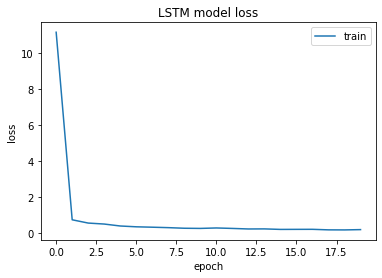

In [157]:
import matplotlib.pyplot as plt 
plt.plot(history.history['loss'])
plt.title('LSTM model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [158]:
y_true = []
for j in range(0,testing_rows+1):
    print('Loop # ',j)
    print(reframed.values[n_train_time,(len(reframed.columns)-1-we_le)])
    test = reframed.values[n_train_time:n_train_time+1, :]
    test_X = test[:, :-1]
    test_y = test[:, -1]
    
    print("check test x--->")
    print(reframed[n_train_time:n_train_time+1])
    print("check test ends x --->")
    test_X = scaler.transform(test_X)
    test_X = test_X.reshape((test_X.shape[0], no_of_timesteps+1, we_le))
    #test_X = test_X.reshape((test_X.shape[0], no_of_timesteps, we_le))
    yhat = model.predict(test_X,batch_size=batch_size_fit)
    if n_train_time+1<len(reframed):
        for k in range(0,len(reframed.columns),we_le):
            if((k+we_le)<(len(reframed.columns)-1)):
                reframed.values[n_train_time+1,k]=reframed.values[n_train_time,(k+we_le)];
        reframed.values[n_train_time+1,(len(reframed.columns)-1-we_le)]=yhat;
    #     reframed.values[n_train_time+1,0]=yhat;
    n_train_time=n_train_time+1
    pred_list=np.append(pred_list,yhat)
    y_true=np.append(y_true,test_y)
    print(reframed[n_train_time-1:n_train_time])
    print(yhat)
n_train_time=original_n_train_time

Loop #  0
13.05905549357143
check test x--->
     var1(t-6)  var2(t-6)  var3(t-6)  var4(t-6)  var5(t-6)  var6(t-6)  \
454  11.385007       10.0        0.0        0.0       10.2        3.0   

     var7(t-6)  var8(t-6)  var9(t-6)  var10(t-6)  ...  var7(t)  var8(t)  \
454       59.0        9.0       20.0        81.0  ...    100.0     29.0   

     var9(t)  var10(t)  var11(t)  var12(t)  var13(t)  var14(t)  var15(t)  \
454     86.0      86.0       0.4    1026.0       8.0     182.0       0.0   

     var1(t+1)  
454  12.573332  

[1 rows x 106 columns]
check test ends x --->
     var1(t-6)  var2(t-6)  var3(t-6)  var4(t-6)  var5(t-6)  var6(t-6)  \
454  11.385007       10.0        0.0        0.0       10.2        3.0   

     var7(t-6)  var8(t-6)  var9(t-6)  var10(t-6)  ...  var7(t)  var8(t)  \
454       59.0        9.0       20.0        81.0  ...    100.0     29.0   

     var9(t)  var10(t)  var11(t)  var12(t)  var13(t)  var14(t)  var15(t)  \
454     86.0      86.0       0.4    1026.0       

     var1(t-6)  var2(t-6)  var3(t-6)  var4(t-6)  var5(t-6)  var6(t-6)  \
461   12.56857        6.0        2.0        0.0        5.4        1.0   

     var7(t-6)  var8(t-6)  var9(t-6)  var10(t-6)  ...  var7(t)  var8(t)  \
461       93.0       26.0       86.0        92.0  ...     53.0     24.0   

     var9(t)  var10(t)  var11(t)  var12(t)  var13(t)  var14(t)  var15(t)  \
461     34.0      86.0       0.0    1015.0       9.0      95.0       0.0   

     var1(t+1)  
461  10.860481  

[1 rows x 106 columns]
[[11.476751]]
Loop #  8
11.476751327514648
check test x--->
     var1(t-6)  var2(t-6)  var3(t-6)  var4(t-6)  var5(t-6)  var6(t-6)  \
462  12.233089        7.0        2.0        0.0       10.1        1.0   

     var7(t-6)  var8(t-6)  var9(t-6)  var10(t-6)  ...  var7(t)  var8(t)  \
462       87.0       24.0       62.0        86.0  ...     46.0     16.0   

     var9(t)  var10(t)  var11(t)  var12(t)  var13(t)  var14(t)  var15(t)  \
462     25.0      86.0       0.0    1005.0       8.0     

     var1(t-6)  var2(t-6)  var3(t-6)  var4(t-6)  var5(t-6)  var6(t-6)  \
469   11.00304       15.0        6.0        0.0       10.1        3.0   

     var7(t-6)  var8(t-6)  var9(t-6)  var10(t-6)  ...  var7(t)  var8(t)  \
469       39.0       18.0       60.0        83.0  ...      1.0     37.0   

     var9(t)  var10(t)  var11(t)  var12(t)  var13(t)  var14(t)  var15(t)  \
469     60.0      63.0       0.0    1009.0      10.0      66.0       0.0   

     var1(t+1)  
469  12.119938  

[1 rows x 106 columns]
[[11.271878]]
Loop #  16
11.271878242492676
check test x--->
     var1(t-6)  var2(t-6)  var3(t-6)  var4(t-6)  var5(t-6)  var6(t-6)  \
470  10.738413        9.0        7.0        0.0        5.6        2.0   

     var7(t-6)  var8(t-6)  var9(t-6)  var10(t-6)  ...  var7(t)  var8(t)  \
470       32.0       17.0       99.0        93.0  ...      8.0     25.0   

     var9(t)  var10(t)  var11(t)  var12(t)  var13(t)  var14(t)  var15(t)  \
470     55.0      83.0       0.4    1010.0      10.0    

     var1(t-6)  var2(t-6)  var3(t-6)  var4(t-6)  var5(t-6)  var6(t-6)  \
478  11.900176        8.0        0.0        0.0        6.0        2.0   

     var7(t-6)  var8(t-6)  var9(t-6)  var10(t-6)  ...  var7(t)  var8(t)  \
478       22.0       34.0       89.0        87.0  ...     62.0     23.0   

     var9(t)  var10(t)  var11(t)  var12(t)  var13(t)  var14(t)  var15(t)  \
478     65.0      80.0       0.2    1016.0       9.0      99.0       0.0   

     var1(t+1)  
478  12.071173  

[1 rows x 106 columns]
[[12.190261]]
Loop #  25
12.190260887145996
check test x--->
     var1(t-6)  var2(t-6)  var3(t-6)  var4(t-6)  var5(t-6)  var6(t-6)  \
479  12.147842        5.0        4.0        0.0        6.0        1.0   

     var7(t-6)  var8(t-6)  var9(t-6)  var10(t-6)  ...  var7(t)  var8(t)  \
479       29.0       40.0       93.0        97.0  ...     69.0     39.0   

     var9(t)  var10(t)  var11(t)  var12(t)  var13(t)  var14(t)  var15(t)  \
479     84.0      88.0      7.25    1010.0       8.0    

     var1(t-6)  var2(t-6)  var3(t-6)  var4(t-6)  var5(t-6)  var6(t-6)  \
487  13.738687        1.0       -1.0        2.2        6.3        1.0   

     var7(t-6)  var8(t-6)  var9(t-6)  var10(t-6)  ...  var7(t)  var8(t)  \
487       83.0       29.0       89.0        89.0  ...     77.0     21.0   

     var9(t)  var10(t)  var11(t)  var12(t)  var13(t)  var14(t)  var15(t)  \
487     58.0      80.0       0.8    1011.0       7.0      31.0       1.0   

     var1(t+1)  
487  11.932721  

[1 rows x 106 columns]
[[12.419645]]
Loop #  34
12.419645309448242
check test x--->
     var1(t-6)  var2(t-6)  var3(t-6)  var4(t-6)  var5(t-6)  var6(t-6)  \
488  12.289434        3.0       -1.0        0.1        9.0        1.0   

     var7(t-6)  var8(t-6)  var9(t-6)  var10(t-6)  ...  var7(t)  var8(t)  \
488       89.0       31.0       73.0        72.0  ...     70.0     18.0   

     var9(t)  var10(t)  var11(t)  var12(t)  var13(t)  var14(t)  var15(t)  \
488     40.0      76.0       0.2    1014.0       5.0    

     var1(t-6)  var2(t-6)  var3(t-6)  var4(t-6)  var5(t-6)  var6(t-6)  \
498  11.256346        4.0       -2.0        1.2        6.6        1.0   

     var7(t-6)  var8(t-6)  var9(t-6)  var10(t-6)  ...  var7(t)  var8(t)  \
498       43.0       33.0       76.0        78.0  ...      2.0     16.0   

     var9(t)  var10(t)  var11(t)  var12(t)  var13(t)  var14(t)  var15(t)  \
498     78.0      87.0       2.7    1004.0       5.0     186.0       0.0   

     var1(t+1)  
498  10.559751  

[1 rows x 106 columns]
[[9.950572]]
Loop #  45
9.95057201385498
check test x--->
     var1(t-6)  var2(t-6)  var3(t-6)  var4(t-6)  var5(t-6)  var6(t-6)  \
499  12.358515        7.0       -1.0        0.3        6.6        1.0   

     var7(t-6)  var8(t-6)  var9(t-6)  var10(t-6)  ...  var7(t)  var8(t)  \
499       36.0       33.0       78.0        75.0  ...      5.0     19.0   

     var9(t)  var10(t)  var11(t)  var12(t)  var13(t)  var14(t)  var15(t)  \
499     75.0      92.0      7.25     997.0       8.0     10

     var1(t-6)  var2(t-6)  var3(t-6)  var4(t-6)  var5(t-6)  var6(t-6)  \
507  10.788342       13.0        3.0        0.0        7.9        2.0   

     var7(t-6)  var8(t-6)  var9(t-6)  var10(t-6)  ...  var7(t)  var8(t)  \
507       18.0       27.0       75.0        90.0  ...     59.0     23.0   

     var9(t)  var10(t)  var11(t)  var12(t)  var13(t)  var14(t)  var15(t)  \
507     44.0      81.0       2.4    1025.0       9.0     186.0       0.0   

     var1(t+1)  
507     9.4857  

[1 rows x 106 columns]
[[9.805943]]
Loop #  54
9.80594253540039
check test x--->
     var1(t-6)  var2(t-6)  var3(t-6)  var4(t-6)  var5(t-6)  var6(t-6)  \
508  10.983222       19.0        9.0        0.0       11.6        4.0   

     var7(t-6)  var8(t-6)  var9(t-6)  var10(t-6)  ...  var7(t)  var8(t)  \
508       25.0       34.0       51.0        82.0  ...     66.0     11.0   

     var9(t)  var10(t)  var11(t)  var12(t)  var13(t)  var14(t)  var15(t)  \
508      0.0      73.0       0.2    1032.0       9.0      7

[1 rows x 106 columns]
check test ends x --->
     var1(t-6)  var2(t-6)  var3(t-6)  var4(t-6)  var5(t-6)  var6(t-6)  \
517   8.906799       19.0        9.0        0.0       14.5        5.0   

     var7(t-6)  var8(t-6)  var9(t-6)  var10(t-6)  ...  var7(t)  var8(t)  \
517       86.0       17.0       38.0        80.0  ...     73.0     21.0   

     var9(t)  var10(t)  var11(t)  var12(t)  var13(t)  var14(t)  var15(t)  \
517     49.0      76.0       0.6    1017.0       9.0     272.0       0.0   

     var1(t+1)  
517   8.844342  

[1 rows x 106 columns]
[[8.785104]]
Loop #  64
8.785103797912598
check test x--->
     var1(t-6)  var2(t-6)  var3(t-6)  var4(t-6)  var5(t-6)  var6(t-6)  \
518   8.543133       20.0        9.0        0.0       11.3        4.0   

     var7(t-6)  var8(t-6)  var9(t-6)  var10(t-6)  ...  var7(t)  var8(t)  \
518       93.0       15.0       60.0        82.0  ...     67.0     18.0   

     var9(t)  var10(t)  var11(t)  var12(t)  var13(t)  var14(t)  var15(t)  \
518     19.0

Loop #  74
8.47314167022705
check test x--->
     var1(t-6)  var2(t-6)  var3(t-6)  var4(t-6)  var5(t-6)  var6(t-6)  \
528   8.750085       14.0        6.0        0.0       10.4        3.0   

     var7(t-6)  var8(t-6)  var9(t-6)  var10(t-6)  ...  var7(t)  var8(t)  \
528       40.0       26.0       45.0        80.0  ...      1.0     30.0   

     var9(t)  var10(t)  var11(t)  var12(t)  var13(t)  var14(t)  var15(t)  \
528     73.0      83.0       1.6    1010.0       9.0     229.0       0.0   

     var1(t+1)  
528    9.27624  

[1 rows x 106 columns]
check test ends x --->
     var1(t-6)  var2(t-6)  var3(t-6)  var4(t-6)  var5(t-6)  var6(t-6)  \
528   8.750085       14.0        6.0        0.0       10.4        3.0   

     var7(t-6)  var8(t-6)  var9(t-6)  var10(t-6)  ...  var7(t)  var8(t)  \
528       40.0       26.0       45.0        80.0  ...      1.0     30.0   

     var9(t)  var10(t)  var11(t)  var12(t)  var13(t)  var14(t)  var15(t)  \
528     73.0      83.0       1.6    1010.0       

     var1(t-6)  var2(t-6)  var3(t-6)  var4(t-6)  var5(t-6)  var6(t-6)  \
535   8.586621       14.0        6.0        0.0       11.5        3.0   

     var7(t-6)  var8(t-6)  var9(t-6)  var10(t-6)  ...  var7(t)  var8(t)  \
535        8.0       26.0       63.0        88.0  ...     48.0     14.0   

     var9(t)  var10(t)  var11(t)  var12(t)  var13(t)  var14(t)  var15(t)  \
535     72.0      84.0       1.4    1006.0       7.0      79.0       0.0   

     var1(t+1)  
535    9.15105  

[1 rows x 106 columns]
[[9.333763]]
Loop #  82
9.333763122558594
check test x--->
     var1(t-6)  var2(t-6)  var3(t-6)  var4(t-6)  var5(t-6)  var6(t-6)  \
536   8.856195       14.0        3.0        0.0       12.5        3.0   

     var7(t-6)  var8(t-6)  var9(t-6)  var10(t-6)  ...  var7(t)  var8(t)  \
536       15.0       26.0       64.0        85.0  ...     55.0     13.0   

     var9(t)  var10(t)  var11(t)  var12(t)  var13(t)  var14(t)  var15(t)  \
536     46.0      78.0       0.1    1008.0       8.0     2

[1 rows x 106 columns]
check test ends x --->
     var1(t-6)  var2(t-6)  var3(t-6)  var4(t-6)  var5(t-6)  var6(t-6)  \
546   8.571507       14.0        8.0        0.0       10.0        3.0   

     var7(t-6)  var8(t-6)  var9(t-6)  var10(t-6)  ...  var7(t)  var8(t)  \
546       82.0       17.0       77.0        79.0  ...     77.0     13.0   

     var9(t)  var10(t)  var11(t)  var12(t)  var13(t)  var14(t)  var15(t)  \
546     93.0      96.0      7.25    1001.0       7.0     131.0       0.0   

     var1(t+1)  
546   9.112343  

[1 rows x 106 columns]
[[8.45339]]
Loop #  93
8.453390121459961
check test x--->
     var1(t-6)  var2(t-6)  var3(t-6)  var4(t-6)  var5(t-6)  var6(t-6)  \
547   8.577814       11.0        4.0        0.0       11.8        2.0   

     var7(t-6)  var8(t-6)  var9(t-6)  var10(t-6)  ...  var7(t)  var8(t)  \
547       89.0       24.0       52.0        71.0  ...     70.0     13.0   

     var9(t)  var10(t)  var11(t)  var12(t)  var13(t)  var14(t)  var15(t)  \
547     94.0 

[1 rows x 106 columns]
check test ends x --->
     var1(t-6)  var2(t-6)  var3(t-6)  var4(t-6)  var5(t-6)  var6(t-6)  \
554   8.423605       13.0        8.0        0.0       12.4        3.0   

     var7(t-6)  var8(t-6)  var9(t-6)  var10(t-6)  ...  var7(t)  var8(t)  \
554       64.0       20.0       96.0        96.0  ...     23.0     16.0   

     var9(t)  var10(t)  var11(t)  var12(t)  var13(t)  var14(t)  var15(t)  \
554     35.0      79.0       0.0    1022.0       7.0      44.0       1.0   

     var1(t+1)  
554   7.966879  

[1 rows x 106 columns]
[[8.354251]]
Loop #  101
8.35425090789795
check test x--->
     var1(t-6)  var2(t-6)  var3(t-6)  var4(t-6)  var5(t-6)  var6(t-6)  \
555   8.464937       21.0       10.0        0.0       16.6        4.0   

     var7(t-6)  var8(t-6)  var9(t-6)  var10(t-6)  ...  var7(t)  var8(t)  \
555       57.0       17.0       53.0        85.0  ...     16.0     18.0   

     var9(t)  var10(t)  var11(t)  var12(t)  var13(t)  var14(t)  var15(t)  \
555     37.0

     var1(t-6)  var2(t-6)  var3(t-6)  var4(t-6)  var5(t-6)  var6(t-6)  \
562   8.119003       21.0        8.0        0.0       16.7        4.0   

     var7(t-6)  var8(t-6)  var9(t-6)  var10(t-6)  ...  var7(t)  var8(t)  \
562        9.0       23.0       20.0        73.0  ...     31.0     31.0   

     var9(t)  var10(t)  var11(t)  var12(t)  var13(t)  var14(t)  var15(t)  \
562     80.0      84.0       2.1    1011.0       9.0     228.0       0.0   

     var1(t+1)  
562   8.204286  

[1 rows x 106 columns]
[[8.164089]]
Loop #  109
8.16408920288086
check test x--->
     var1(t-6)  var2(t-6)  var3(t-6)  var4(t-6)  var5(t-6)  var6(t-6)  \
563   8.185621       18.0        6.0        0.0       16.6        4.0   

     var7(t-6)  var8(t-6)  var9(t-6)  var10(t-6)  ...  var7(t)  var8(t)  \
563        3.0       23.0       26.0        76.0  ...     38.0     22.0   

     var9(t)  var10(t)  var11(t)  var12(t)  var13(t)  var14(t)  var15(t)  \
563     51.0      74.0       0.0    1016.0       9.0     2

     var1(t-6)  var2(t-6)  var3(t-6)  var4(t-6)  var5(t-6)  var6(t-6)  \
571   8.542178       17.0       10.0        0.0       16.6        4.0   

     var7(t-6)  var8(t-6)  var9(t-6)  var10(t-6)  ...  var7(t)  var8(t)  \
571       52.0       16.0       51.0        75.0  ...     92.0     31.0   

     var9(t)  var10(t)  var11(t)  var12(t)  var13(t)  var14(t)  var15(t)  \
571     81.0      90.0       1.3    1007.0       8.0     208.0       1.0   

     var1(t+1)  
571   9.008411  

[1 rows x 106 columns]
[[8.568678]]
Loop #  118
8.56867790222168
check test x--->
     var1(t-6)  var2(t-6)  var3(t-6)  var4(t-6)  var5(t-6)  var6(t-6)  \
572   8.286596       19.0       10.0        0.0       16.8        5.0   

     var7(t-6)  var8(t-6)  var9(t-6)  var10(t-6)  ...  var7(t)  var8(t)  \
572       58.0       22.0       34.0        75.0  ...     99.0     30.0   

     var9(t)  var10(t)  var11(t)  var12(t)  var13(t)  var14(t)  var15(t)  \
572     82.0      85.0       1.9    1009.0      10.0     2

     var1(t-6)  var2(t-6)  var3(t-6)  var4(t-6)  var5(t-6)  var6(t-6)  \
581   8.145675       20.0        9.0        0.0       15.0        4.0   

     var7(t-6)  var8(t-6)  var9(t-6)  var10(t-6)  ...  var7(t)  var8(t)  \
581       81.0       11.0       56.0        75.0  ...     40.0     16.0   

     var9(t)  var10(t)  var11(t)  var12(t)  var13(t)  var14(t)  var15(t)  \
581     68.0      77.0       0.1    1011.0       9.0     201.0       0.0   

     var1(t+1)  
581   8.195047  

[1 rows x 106 columns]
[[7.9480953]]
Loop #  128
7.948095321655273
check test x--->
     var1(t-6)  var2(t-6)  var3(t-6)  var4(t-6)  var5(t-6)  var6(t-6)  \
582   8.158891       20.0       11.0        0.0       14.2        4.0   

     var7(t-6)  var8(t-6)  var9(t-6)  var10(t-6)  ...  var7(t)  var8(t)  \
582       74.0       13.0       71.0        78.0  ...     33.0     18.0   

     var9(t)  var10(t)  var11(t)  var12(t)  var13(t)  var14(t)  var15(t)  \
582     70.0      81.0       2.7    1009.0       9.0    

     var1(t-6)  var2(t-6)  var3(t-6)  var4(t-6)  var5(t-6)  var6(t-6)  \
589   7.923092       22.0       10.0        0.0       15.0        4.0   

     var7(t-6)  var8(t-6)  var9(t-6)  var10(t-6)  ...  var7(t)  var8(t)  \
589       26.0       19.0       52.0        81.0  ...     14.0     18.0   

     var9(t)  var10(t)  var11(t)  var12(t)  var13(t)  var14(t)  var15(t)  \
589     12.0      72.0       0.2    1025.0       9.0      30.0       0.0   

     var1(t+1)  
589   7.770924  

[1 rows x 106 columns]
[[7.7240043]]
Loop #  136
7.72400426864624
check test x--->
     var1(t-6)  var2(t-6)  var3(t-6)  var4(t-6)  var5(t-6)  var6(t-6)  \
590   7.958148       25.0       11.0        0.0       16.6        6.0   

     var7(t-6)  var8(t-6)  var9(t-6)  var10(t-6)  ...  var7(t)  var8(t)  \
590       20.0       12.0       41.0        77.0  ...     21.0     14.0   

     var9(t)  var10(t)  var11(t)  var12(t)  var13(t)  var14(t)  var15(t)  \
590     39.0      75.0       0.0    1025.0       8.0     

     var1(t-6)  var2(t-6)  var3(t-6)  var4(t-6)  var5(t-6)  var6(t-6)  \
597   7.818411       25.0        9.0        0.0       16.6        6.0   

     var7(t-6)  var8(t-6)  var9(t-6)  var10(t-6)  ...  var7(t)  var8(t)  \
597       28.0        9.0       41.0        74.0  ...     68.0     15.0   

     var9(t)  var10(t)  var11(t)  var12(t)  var13(t)  var14(t)  var15(t)  \
597      4.0      67.0       0.0    1026.0      10.0      50.0       0.0   

     var1(t+1)  
597   7.876777  

[1 rows x 106 columns]
check test ends x --->
     var1(t-6)  var2(t-6)  var3(t-6)  var4(t-6)  var5(t-6)  var6(t-6)  \
597   7.818411       25.0        9.0        0.0       16.6        6.0   

     var7(t-6)  var8(t-6)  var9(t-6)  var10(t-6)  ...  var7(t)  var8(t)  \
597       28.0        9.0       41.0        74.0  ...     68.0     15.0   

     var9(t)  var10(t)  var11(t)  var12(t)  var13(t)  var14(t)  var15(t)  \
597      4.0      67.0       0.0    1026.0      10.0      50.0       0.0   

     var1(t+1)  


     var1(t-6)  var2(t-6)  var3(t-6)  var4(t-6)  var5(t-6)  var6(t-6)  \
604   7.791264       26.0       13.0        0.0       16.0        6.0   

     var7(t-6)  var8(t-6)  var9(t-6)  var10(t-6)  ...  var7(t)  var8(t)  \
604       75.0       18.0       15.0        69.0  ...     84.0     17.0   

     var9(t)  var10(t)  var11(t)  var12(t)  var13(t)  var14(t)  var15(t)  \
604     30.0      73.0       0.4    1013.0       8.0     190.0       0.0   

     var1(t+1)  
604   7.936592  

[1 rows x 106 columns]
[[7.955448]]
Loop #  151
7.955448150634766
check test x--->
     var1(t-6)  var2(t-6)  var3(t-6)  var4(t-6)  var5(t-6)  var6(t-6)  \
605    7.92098       21.0       14.0        0.0       12.9        4.0   

     var7(t-6)  var8(t-6)  var9(t-6)  var10(t-6)  ...  var7(t)  var8(t)  \
605       82.0       20.0       81.0        82.0  ...     77.0      7.0   

     var9(t)  var10(t)  var11(t)  var12(t)  var13(t)  var14(t)  var15(t)  \
605     47.0      70.0       0.5    1012.0      10.0     

     var1(t-6)  var2(t-6)  var3(t-6)  var4(t-6)  var5(t-6)  var6(t-6)  \
612    8.01413       27.0       14.0        0.0       12.5        5.0   

     var7(t-6)  var8(t-6)  var9(t-6)  var10(t-6)  ...  var7(t)  var8(t)  \
612       71.0        8.0       51.0        72.0  ...     30.0     17.0   

     var9(t)  var10(t)  var11(t)  var12(t)  var13(t)  var14(t)  var15(t)  \
612     18.0      74.0       0.3    1009.0      10.0     210.0       0.0   

     var1(t+1)  
612   7.741152  

[1 rows x 106 columns]
[[7.8854094]]
Loop #  159
7.885409355163574
check test x--->
     var1(t-6)  var2(t-6)  var3(t-6)  var4(t-6)  var5(t-6)  var6(t-6)  \
613   8.239933       23.0       13.0        0.0       14.5        6.0   

     var7(t-6)  var8(t-6)  var9(t-6)  var10(t-6)  ...  var7(t)  var8(t)  \
613       64.0       27.0       50.0        74.0  ...     23.0     22.0   

     var9(t)  var10(t)  var11(t)  var12(t)  var13(t)  var14(t)  var15(t)  \
613     20.0      68.0       0.5    1015.0      10.0    

     var1(t-6)  var2(t-6)  var3(t-6)  var4(t-6)  var5(t-6)  var6(t-6)  \
622   7.810624       23.0       12.0        0.0       12.5        4.0   

     var7(t-6)  var8(t-6)  var9(t-6)  var10(t-6)  ...  var7(t)  var8(t)  \
622        3.0       10.0       47.0        70.0  ...     38.0     17.0   

     var9(t)  var10(t)  var11(t)  var12(t)  var13(t)  var14(t)  var15(t)  \
622     49.0      65.0       0.3    1017.0      10.0     285.0       0.0   

     var1(t+1)  
622    7.73623  

[1 rows x 106 columns]
[[7.9915423]]
Loop #  169
7.991542339324951
check test x--->
     var1(t-6)  var2(t-6)  var3(t-6)  var4(t-6)  var5(t-6)  var6(t-6)  \
623    7.84588       22.0       13.0        0.0       11.4        4.0   

     var7(t-6)  var8(t-6)  var9(t-6)  var10(t-6)  ...  var7(t)  var8(t)  \
623        4.0       16.0       48.0        67.0  ...     44.0     17.0   

     var9(t)  var10(t)  var11(t)  var12(t)  var13(t)  var14(t)  var15(t)  \
623     29.0      71.0       0.2    1021.0       9.0    

     var1(t-6)  var2(t-6)  var3(t-6)  var4(t-6)  var5(t-6)  var6(t-6)  \
631   8.038652       25.0       16.0        0.0       10.3        5.0   

     var7(t-6)  var8(t-6)  var9(t-6)  var10(t-6)  ...  var7(t)  var8(t)  \
631       58.0       21.0       64.0        76.0  ...     99.0     11.0   

     var9(t)  var10(t)  var11(t)  var12(t)  var13(t)  var14(t)  var15(t)  \
631     19.0      68.0       0.0    1024.0      10.0     227.0       0.0   

     var1(t+1)  
631   8.043843  

[1 rows x 106 columns]
[[8.015434]]
Loop #  178
8.015434265136719
check test x--->
     var1(t-6)  var2(t-6)  var3(t-6)  var4(t-6)  var5(t-6)  var6(t-6)  \
632   7.981496       21.0       15.0        0.0       11.3        4.0   

     var7(t-6)  var8(t-6)  var9(t-6)  var10(t-6)  ...  var7(t)  var8(t)  \
632       65.0       19.0       67.0        88.0  ...     95.0      9.0   

     var9(t)  var10(t)  var11(t)  var12(t)  var13(t)  var14(t)  var15(t)  \
632     62.0      82.0      7.25    1020.0       7.0     

     var1(t-6)  var2(t-6)  var3(t-6)  var4(t-6)  var5(t-6)  var6(t-6)  \
640   8.048688       18.0       15.0        0.0        9.9        4.0   

     var7(t-6)  var8(t-6)  var9(t-6)  var10(t-6)  ...  var7(t)  var8(t)  \
640       81.0       18.0       86.0        92.0  ...     40.0     16.0   

     var9(t)  var10(t)  var11(t)  var12(t)  var13(t)  var14(t)  var15(t)  \
640     47.0      78.0       0.1    1020.0       9.0     245.0       0.0   

     var1(t+1)  
640   7.924299  

[1 rows x 106 columns]
[[8.027719]]
Loop #  187
8.027718544006348
check test x--->
     var1(t-6)  var2(t-6)  var3(t-6)  var4(t-6)  var5(t-6)  var6(t-6)  \
641   8.409458       22.0       13.0        0.0        9.3        4.0   

     var7(t-6)  var8(t-6)  var9(t-6)  var10(t-6)  ...  var7(t)  var8(t)  \
641       74.0       21.0       67.0        85.0  ...     34.0     18.0   

     var9(t)  var10(t)  var11(t)  var12(t)  var13(t)  var14(t)  var15(t)  \
641     34.0      67.0       0.0    1025.0       8.0     

     var1(t-6)  var2(t-6)  var3(t-6)  var4(t-6)  var5(t-6)  var6(t-6)  \
650   8.016085       25.0       15.0        0.0        9.1        5.0   

     var7(t-6)  var8(t-6)  var9(t-6)  var10(t-6)  ...  var7(t)  var8(t)  \
650       13.0        9.0       35.0        80.0  ...     27.0     13.0   

     var9(t)  var10(t)  var11(t)  var12(t)  var13(t)  var14(t)  var15(t)  \
650     47.0      94.0       6.7    1016.0       4.0     178.0       0.0   

     var1(t+1)  
650   8.718352  

[1 rows x 106 columns]
check test ends x --->
     var1(t-6)  var2(t-6)  var3(t-6)  var4(t-6)  var5(t-6)  var6(t-6)  \
650   8.016085       25.0       15.0        0.0        9.1        5.0   

     var7(t-6)  var8(t-6)  var9(t-6)  var10(t-6)  ...  var7(t)  var8(t)  \
650       13.0        9.0       35.0        80.0  ...     27.0     13.0   

     var9(t)  var10(t)  var11(t)  var12(t)  var13(t)  var14(t)  var15(t)  \
650     47.0      94.0       6.7    1016.0       4.0     178.0       0.0   

     var1(t+1)  


     var1(t-6)  var2(t-6)  var3(t-6)  var4(t-6)  var5(t-6)  var6(t-6)  \
658   8.538476       15.0        9.0        0.0        6.5        3.0   

     var7(t-6)  var8(t-6)  var9(t-6)  var10(t-6)  ...  var7(t)  var8(t)  \
658       41.0       20.0       72.0        85.0  ...     81.0     20.0   

     var9(t)  var10(t)  var11(t)  var12(t)  var13(t)  var14(t)  var15(t)  \
658     61.0      84.0       1.9    1000.0       8.0     238.0       0.0   

     var1(t+1)  
658   8.878986  

[1 rows x 106 columns]
[[8.97679]]
Loop #  205
8.976790428161621
check test x--->
     var1(t-6)  var2(t-6)  var3(t-6)  var4(t-6)  var5(t-6)  var6(t-6)  \
659    8.76208       19.0       10.0        0.0        7.7        4.0   

     var7(t-6)  var8(t-6)  var9(t-6)  var10(t-6)  ...  var7(t)  var8(t)  \
659       48.0        8.0       80.0        85.0  ...     88.0     17.0   

     var9(t)  var10(t)  var11(t)  var12(t)  var13(t)  var14(t)  var15(t)  \
659     45.0      80.0       0.6    1003.0       8.0     3

     var1(t-6)  var2(t-6)  var3(t-6)  var4(t-6)  var5(t-6)  var6(t-6)  \
666   8.960196       17.0        7.0        0.0        7.6        3.0   

     var7(t-6)  var8(t-6)  var9(t-6)  var10(t-6)  ...  var7(t)  var8(t)  \
666       95.0       23.0       65.0        87.0  ...     64.0      6.0   

     var9(t)  var10(t)  var11(t)  var12(t)  var13(t)  var14(t)  var15(t)  \
666     55.0      84.0       0.0    1012.0       7.0     110.0       0.0   

     var1(t+1)  
666   8.628416  

[1 rows x 106 columns]
[[8.331338]]
Loop #  213
8.331337928771973
check test x--->
     var1(t-6)  var2(t-6)  var3(t-6)  var4(t-6)  var5(t-6)  var6(t-6)  \
667   9.192602       22.0        8.0        0.0       11.6        3.0   

     var7(t-6)  var8(t-6)  var9(t-6)  var10(t-6)  ...  var7(t)  var8(t)  \
667       98.0       14.0       34.0        83.0  ...     58.0     16.0   

     var9(t)  var10(t)  var11(t)  var12(t)  var13(t)  var14(t)  var15(t)  \
667     48.0      81.0       0.0    1016.0       7.0     

     var1(t-6)  var2(t-6)  var3(t-6)  var4(t-6)  var5(t-6)  var6(t-6)  \
675    8.68812       20.0       11.0        0.0       10.2        4.0   

     var7(t-6)  var8(t-6)  var9(t-6)  var10(t-6)  ...  var7(t)  var8(t)  \
675       44.0       25.0       45.0        75.0  ...      3.0     25.0   

     var9(t)  var10(t)  var11(t)  var12(t)  var13(t)  var14(t)  var15(t)  \
675     77.0      89.0       0.7    1009.0       9.0     193.0       0.0   

     var1(t+1)  
675   9.152314  

[1 rows x 106 columns]
check test ends x --->
     var1(t-6)  var2(t-6)  var3(t-6)  var4(t-6)  var5(t-6)  var6(t-6)  \
675    8.68812       20.0       11.0        0.0       10.2        4.0   

     var7(t-6)  var8(t-6)  var9(t-6)  var10(t-6)  ...  var7(t)  var8(t)  \
675       44.0       25.0       45.0        75.0  ...      3.0     25.0   

     var9(t)  var10(t)  var11(t)  var12(t)  var13(t)  var14(t)  var15(t)  \
675     77.0      89.0       0.7    1009.0       9.0     193.0       0.0   

     var1(t+1)  


     var1(t-6)  var2(t-6)  var3(t-6)  var4(t-6)  var5(t-6)  var6(t-6)  \
683   8.474366       19.0       11.0        0.0       11.2        5.0   

     var7(t-6)  var8(t-6)  var9(t-6)  var10(t-6)  ...  var7(t)  var8(t)  \
683       10.0       11.0       18.0        77.0  ...     51.0     19.0   

     var9(t)  var10(t)  var11(t)  var12(t)  var13(t)  var14(t)  var15(t)  \
683     66.0      83.0       6.5    1018.0       9.0     114.0       1.0   

     var1(t+1)  
683  10.967507  

[1 rows x 106 columns]
check test ends x --->
     var1(t-6)  var2(t-6)  var3(t-6)  var4(t-6)  var5(t-6)  var6(t-6)  \
683   8.474366       19.0       11.0        0.0       11.2        5.0   

     var7(t-6)  var8(t-6)  var9(t-6)  var10(t-6)  ...  var7(t)  var8(t)  \
683       10.0       11.0       18.0        77.0  ...     51.0     19.0   

     var9(t)  var10(t)  var11(t)  var12(t)  var13(t)  var14(t)  var15(t)  \
683     66.0      83.0       6.5    1018.0       9.0     114.0       1.0   

     var1(t+1)  


[1 rows x 106 columns]
check test ends x --->
     var1(t-6)  var2(t-6)  var3(t-6)  var4(t-6)  var5(t-6)  var6(t-6)  \
692   9.080314       13.0        7.0        0.0       10.8        3.0   

     var7(t-6)  var8(t-6)  var9(t-6)  var10(t-6)  ...  var7(t)  var8(t)  \
692       71.0       16.0       59.0        89.0  ...     88.0     31.0   

     var9(t)  var10(t)  var11(t)  var12(t)  var13(t)  var14(t)  var15(t)  \
692     59.0      93.0       0.7    1006.0       8.0     184.0       0.0   

     var1(t+1)  
692   9.311661  

[1 rows x 106 columns]
[[8.856193]]
Loop #  239
8.856192588806152
check test x--->
     var1(t-6)  var2(t-6)  var3(t-6)  var4(t-6)  var5(t-6)  var6(t-6)  \
693   9.080411       14.0        6.0        0.0        6.9        3.0   

     var7(t-6)  var8(t-6)  var9(t-6)  var10(t-6)  ...  var7(t)  var8(t)  \
693       78.0       25.0       62.0        96.0  ...     81.0     32.0   

     var9(t)  var10(t)  var11(t)  var12(t)  var13(t)  var14(t)  var15(t)  \
693     43.

[1 rows x 106 columns]
check test ends x --->
     var1(t-6)  var2(t-6)  var3(t-6)  var4(t-6)  var5(t-6)  var6(t-6)  \
700   8.740681       16.0       11.0        0.0        7.1        3.0   

     var7(t-6)  var8(t-6)  var9(t-6)  var10(t-6)  ...  var7(t)  var8(t)  \
700       75.0       31.0       38.0        84.0  ...     34.0     29.0   

     var9(t)  var10(t)  var11(t)  var12(t)  var13(t)  var14(t)  var15(t)  \
700     22.0      83.0       0.4    1010.0      10.0     253.0       0.0   

     var1(t+1)  
700   9.929817  

[1 rows x 106 columns]
[[8.974899]]
Loop #  247
8.974899291992188
check test x--->
     var1(t-6)  var2(t-6)  var3(t-6)  var4(t-6)  var5(t-6)  var6(t-6)  \
701   8.832899       17.0        9.0        0.0        8.7        3.0   

     var7(t-6)  var8(t-6)  var9(t-6)  var10(t-6)  ...  var7(t)  var8(t)  \
701       68.0       17.0       28.0        88.0  ...     27.0     23.0   

     var9(t)  var10(t)  var11(t)  var12(t)  var13(t)  var14(t)  var15(t)  \
701     23.

     var1(t-6)  var2(t-6)  var3(t-6)  var4(t-6)  var5(t-6)  var6(t-6)  \
708   9.196468       14.0       10.0        0.0        5.4        3.0   

     var7(t-6)  var8(t-6)  var9(t-6)  var10(t-6)  ...  var7(t)  var8(t)  \
708       21.0       25.0       84.0        91.0  ...     20.0     27.0   

     var9(t)  var10(t)  var11(t)  var12(t)  var13(t)  var14(t)  var15(t)  \
708     72.0      96.0       2.2     999.0       7.0     223.0       0.0   

     var1(t+1)  
708  10.119347  

[1 rows x 106 columns]
[[9.651923]]
Loop #  255
9.651923179626465
check test x--->
     var1(t-6)  var2(t-6)  var3(t-6)  var4(t-6)  var5(t-6)  var6(t-6)  \
709   9.226153       15.0       11.0        0.0        3.7        3.0   

     var7(t-6)  var8(t-6)  var9(t-6)  var10(t-6)  ...  var7(t)  var8(t)  \
709       14.0       19.0       89.0        94.0  ...     27.0     19.0   

     var9(t)  var10(t)  var11(t)  var12(t)  var13(t)  var14(t)  var15(t)  \
709     46.0      87.0       0.2    1006.0       8.0     

     var1(t-6)  var2(t-6)  var3(t-6)  var4(t-6)  var5(t-6)  var6(t-6)  \
717  10.662788       10.0        4.0        0.0        6.9        2.0   

     var7(t-6)  var8(t-6)  var9(t-6)  var10(t-6)  ...  var7(t)  var8(t)  \
717       40.0       18.0       60.0        92.0  ...     81.0     22.0   

     var9(t)  var10(t)  var11(t)  var12(t)  var13(t)  var14(t)  var15(t)  \
717      9.0      86.0       0.0    1032.0      10.0     221.0       0.0   

     var1(t+1)  
717    11.2958  

[1 rows x 106 columns]
[[11.70769]]
Loop #  264
11.707690238952637
check test x--->
     var1(t-6)  var2(t-6)  var3(t-6)  var4(t-6)  var5(t-6)  var6(t-6)  \
718  11.319166        8.0        3.0        0.0        8.7        2.0   

     var7(t-6)  var8(t-6)  var9(t-6)  var10(t-6)  ...  var7(t)  var8(t)  \
718       47.0       20.0       36.0        91.0  ...     88.0     11.0   

     var9(t)  var10(t)  var11(t)  var12(t)  var13(t)  var14(t)  var15(t)  \
718     22.0      87.0       0.0    1031.0       9.0    

[1 rows x 106 columns]
check test ends x --->
     var1(t-6)  var2(t-6)  var3(t-6)  var4(t-6)  var5(t-6)  var6(t-6)  \
729  12.075911        6.0        2.0        0.0        8.7        1.0   

     var7(t-6)  var8(t-6)  var9(t-6)  var10(t-6)  ...  var7(t)  var8(t)  \
729       78.0       32.0       52.0        92.0  ...     38.0     11.0   

     var9(t)  var10(t)  var11(t)  var12(t)  var13(t)  var14(t)  var15(t)  \
729     94.0      97.0       0.3    1034.0       2.5     239.0       0.0   

     var1(t+1)  
729  11.053485  

[1 rows x 106 columns]
[[11.736135]]
Loop #  276
11.73613452911377
check test x--->
     var1(t-6)  var2(t-6)  var3(t-6)  var4(t-6)  var5(t-6)  var6(t-6)  \
730  12.284187        7.0        2.0        0.0        8.7        1.0   

     var7(t-6)  var8(t-6)  var9(t-6)  var10(t-6)  ...  var7(t)  var8(t)  \
730       72.0       32.0       39.0        88.0  ...     31.0     13.0   

     var9(t)  var10(t)  var11(t)  var12(t)  var13(t)  var14(t)  var15(t)  \
730     75

     var1(t-6)  var2(t-6)  var3(t-6)  var4(t-6)  var5(t-6)  var6(t-6)  \
737  12.006127       10.0        5.0        0.0        3.1        2.0   

     var7(t-6)  var8(t-6)  var9(t-6)  var10(t-6)  ...  var7(t)  var8(t)  \
737       24.0       28.0       77.0        91.0  ...     17.0     42.0   

     var9(t)  var10(t)  var11(t)  var12(t)  var13(t)  var14(t)  var15(t)  \
737     22.0      88.0       0.0    1024.0      10.0     254.0       0.0   

     var1(t+1)  
737  11.605175  

[1 rows x 106 columns]
[[12.697208]]
Loop #  284
12.697208404541016
check test x--->
     var1(t-6)  var2(t-6)  var3(t-6)  var4(t-6)  var5(t-6)  var6(t-6)  \
738  12.323813        7.0        2.0        0.0        8.1        2.0   

     var7(t-6)  var8(t-6)  var9(t-6)  var10(t-6)  ...  var7(t)  var8(t)  \
738       17.0       27.0       32.0        91.0  ...     23.0     28.0   

     var9(t)  var10(t)  var11(t)  var12(t)  var13(t)  var14(t)  var15(t)  \
738     43.0      88.0       0.1    1027.0       9.0   

[1 rows x 106 columns]
check test ends x --->
     var1(t-6)  var2(t-6)  var3(t-6)  var4(t-6)  var5(t-6)  var6(t-6)  \
745  13.329389        9.0        5.0        0.0        8.0        3.0   

     var7(t-6)  var8(t-6)  var9(t-6)  var10(t-6)  ...  var7(t)  var8(t)  \
745       30.0       24.0       56.0        94.0  ...     71.0     29.0   

     var9(t)  var10(t)  var11(t)  var12(t)  var13(t)  var14(t)  var15(t)  \
745     73.0      95.0       2.4    1020.0       8.0     197.0       0.0   

     var1(t+1)  
745  11.736655  

[1 rows x 106 columns]
[[12.687917]]
Loop #  292
12.68791675567627
check test x--->
     var1(t-6)  var2(t-6)  var3(t-6)  var4(t-6)  var5(t-6)  var6(t-6)  \
746  13.233761       10.0        4.0        0.0        6.8        2.0   

     var7(t-6)  var8(t-6)  var9(t-6)  var10(t-6)  ...  var7(t)  var8(t)  \
746       37.0       31.0       44.0        93.0  ...     77.0     37.0   

     var9(t)  var10(t)  var11(t)  var12(t)  var13(t)  var14(t)  var15(t)  \
746     43

[1 rows x 106 columns]
check test ends x --->
     var1(t-6)  var2(t-6)  var3(t-6)  var4(t-6)  var5(t-6)  var6(t-6)  \
753  13.125021       12.0        9.0        0.0        4.8        3.0   

     var7(t-6)  var8(t-6)  var9(t-6)  var10(t-6)  ...  var7(t)  var8(t)  \
753       84.0       39.0       78.0        94.0  ...     75.0     48.5   

     var9(t)  var10(t)  var11(t)  var12(t)  var13(t)  var14(t)  var15(t)  \
753     89.0      94.0      7.25    1013.0       8.0     197.0       1.0   

     var1(t+1)  
753  11.942016  

[1 rows x 106 columns]
[[12.11373]]
Loop #  300
12.113730430603027
check test x--->
     var1(t-6)  var2(t-6)  var3(t-6)  var4(t-6)  var5(t-6)  var6(t-6)  \
754  12.075194       12.0        9.0        0.0        1.9        3.0   

     var7(t-6)  var8(t-6)  var9(t-6)  var10(t-6)  ...  var7(t)  var8(t)  \
754       91.0       36.0       99.0        94.0  ...     68.0     38.0   

     var9(t)  var10(t)  var11(t)  var12(t)  var13(t)  var14(t)  var15(t)  \
754     23

[1 rows x 106 columns]
check test ends x --->
     var1(t-6)  var2(t-6)  var3(t-6)  var4(t-6)  var5(t-6)  var6(t-6)  \
761   11.80304       10.0        3.0        0.0        1.9        2.0   

     var7(t-6)  var8(t-6)  var9(t-6)  var10(t-6)  ...  var7(t)  var8(t)  \
761       62.0       48.0       79.0        92.0  ...     21.0     29.0   

     var9(t)  var10(t)  var11(t)  var12(t)  var13(t)  var14(t)  var15(t)  \
761     22.0      91.0       0.0    1014.0      10.0     243.0       1.0   

     var1(t+1)  
761   11.81361  

[1 rows x 106 columns]
[[11.651382]]
Loop #  308
11.651382446289062
check test x--->
     var1(t-6)  var2(t-6)  var3(t-6)  var4(t-6)  var5(t-6)  var6(t-6)  \
762  11.217028       10.0        5.0        0.0        5.8        2.0   

     var7(t-6)  var8(t-6)  var9(t-6)  var10(t-6)  ...  var7(t)  var8(t)  \
762       55.0       43.0       56.0        88.0  ...     14.0     48.0   

     var9(t)  var10(t)  var11(t)  var12(t)  var13(t)  var14(t)  var15(t)  \
762     6

     var1(t-6)  var2(t-6)  var3(t-6)  var4(t-6)  var5(t-6)  var6(t-6)  \
769  11.082362       10.0        5.0        0.0        2.0        2.0   

     var7(t-6)  var8(t-6)  var9(t-6)  var10(t-6)  ...  var7(t)  var8(t)  \
769        7.0       34.0       72.0        95.0  ...     33.0     48.0   

     var9(t)  var10(t)  var11(t)  var12(t)  var13(t)  var14(t)  var15(t)  \
769     62.0      90.0       1.0     995.0      10.0     202.0       0.0   

     var1(t+1)  
769  11.268234  

[1 rows x 106 columns]
[[11.248568]]
Loop #  316
11.248567581176758
check test x--->
     var1(t-6)  var2(t-6)  var3(t-6)  var4(t-6)  var5(t-6)  var6(t-6)  \
770  11.359136        9.0        6.0        0.0        2.0        2.0   

     var7(t-6)  var8(t-6)  var9(t-6)  var10(t-6)  ...  var7(t)  var8(t)  \
770        1.0       47.0       75.0        93.0  ...     40.0     45.0   

     var9(t)  var10(t)  var11(t)  var12(t)  var13(t)  var14(t)  var15(t)  \
770     48.0      90.0       0.4    1003.0      10.0   

     var1(t-6)  var2(t-6)  var3(t-6)  var4(t-6)  var5(t-6)  var6(t-6)  \
780  12.203801        7.0        1.0        0.0        5.8        2.0   

     var7(t-6)  var8(t-6)  var9(t-6)  var10(t-6)  ...  var7(t)  var8(t)  \
780       67.0       22.0       48.0        92.0  ...     92.0     34.0   

     var9(t)  var10(t)  var11(t)  var12(t)  var13(t)  var14(t)  var15(t)  \
780     59.0      89.0       0.8     991.0       8.0     191.0       0.0   

     var1(t+1)  
780   11.54657  

[1 rows x 106 columns]
check test ends x --->
     var1(t-6)  var2(t-6)  var3(t-6)  var4(t-6)  var5(t-6)  var6(t-6)  \
780  12.203801        7.0        1.0        0.0        5.8        2.0   

     var7(t-6)  var8(t-6)  var9(t-6)  var10(t-6)  ...  var7(t)  var8(t)  \
780       67.0       22.0       48.0        92.0  ...     92.0     34.0   

     var9(t)  var10(t)  var11(t)  var12(t)  var13(t)  var14(t)  var15(t)  \
780     59.0      89.0       0.8     991.0       8.0     191.0       0.0   

     var1(t+1)  


     var1(t-6)  var2(t-6)  var3(t-6)  var4(t-6)  var5(t-6)  var6(t-6)  \
788  12.620119        7.0        3.0        0.0        6.9        2.0   

     var7(t-6)  var8(t-6)  var9(t-6)  var10(t-6)  ...  var7(t)  var8(t)  \
788       79.0       19.0       45.0        90.0  ...     38.0     30.0   

     var9(t)  var10(t)  var11(t)  var12(t)  var13(t)  var14(t)  var15(t)  \
788     65.0      91.0       0.1    1012.0       6.0     228.0       1.0   

     var1(t+1)  
788  12.729659  

[1 rows x 106 columns]
check test ends x --->
     var1(t-6)  var2(t-6)  var3(t-6)  var4(t-6)  var5(t-6)  var6(t-6)  \
788  12.620119        7.0        3.0        0.0        6.9        2.0   

     var7(t-6)  var8(t-6)  var9(t-6)  var10(t-6)  ...  var7(t)  var8(t)  \
788       79.0       19.0       45.0        90.0  ...     38.0     30.0   

     var9(t)  var10(t)  var11(t)  var12(t)  var13(t)  var14(t)  var15(t)  \
788     65.0      91.0       0.1    1012.0       6.0     228.0       1.0   

     var1(t+1)  


     var1(t-6)  var2(t-6)  var3(t-6)  var4(t-6)  var5(t-6)  var6(t-6)  \
797  11.675564        8.0        3.0        0.0        6.9        2.0   

     var7(t-6)  var8(t-6)  var9(t-6)  var10(t-6)  ...  var7(t)  var8(t)  \
797       18.0       33.0       65.0        92.0  ...     23.0     37.0   

     var9(t)  var10(t)  var11(t)  var12(t)  var13(t)  var14(t)  var15(t)  \
797     28.0      86.0       0.0    1004.0      10.0     143.0       0.0   

     var1(t+1)  
797  11.095584  

[1 rows x 106 columns]
[[11.205359]]
Loop #  344
11.20535945892334
check test x--->
     var1(t-6)  var2(t-6)  var3(t-6)  var4(t-6)  var5(t-6)  var6(t-6)  \
798  11.548674        4.0        3.0        0.0        3.4        1.0   

     var7(t-6)  var8(t-6)  var9(t-6)  var10(t-6)  ...  var7(t)  var8(t)  \
798       11.0       25.0       99.0        98.0  ...     30.0     36.0   

     var9(t)  var10(t)  var11(t)  var12(t)  var13(t)  var14(t)  var15(t)  \
798     52.0      84.0       0.4     998.0       9.0    

     var1(t-6)  var2(t-6)  var3(t-6)  var4(t-6)  var5(t-6)  var6(t-6)  \
806  11.163495        8.0        5.0        0.0        3.5        2.0   

     var7(t-6)  var8(t-6)  var9(t-6)  var10(t-6)  ...  var7(t)  var8(t)  \
806       43.0       39.0       67.0        92.0  ...     84.0     47.0   

     var9(t)  var10(t)  var11(t)  var12(t)  var13(t)  var14(t)  var15(t)  \
806     58.0      91.0       5.8     995.0       8.0     200.0       0.0   

     var1(t+1)  
806  11.285737  

[1 rows x 106 columns]
check test ends x --->
     var1(t-6)  var2(t-6)  var3(t-6)  var4(t-6)  var5(t-6)  var6(t-6)  \
806  11.163495        8.0        5.0        0.0        3.5        2.0   

     var7(t-6)  var8(t-6)  var9(t-6)  var10(t-6)  ...  var7(t)  var8(t)  \
806       43.0       39.0       67.0        92.0  ...     84.0     47.0   

     var9(t)  var10(t)  var11(t)  var12(t)  var13(t)  var14(t)  var15(t)  \
806     58.0      91.0       5.8     995.0       8.0     200.0       0.0   

     var1(t+1)  


     var1(t-6)  var2(t-6)  var3(t-6)  var4(t-6)  var5(t-6)  var6(t-6)  \
814   11.55894       10.0        2.0        0.0        6.6        2.0   

     var7(t-6)  var8(t-6)  var9(t-6)  var10(t-6)  ...  var7(t)  var8(t)  \
814       97.0       45.0       59.0        91.0  ...     62.0     34.0   

     var9(t)  var10(t)  var11(t)  var12(t)  var13(t)  var14(t)  var15(t)  \
814     75.0      93.0       1.0    1002.0       7.0     203.0       0.0   

     var1(t+1)  
814  10.518126  

[1 rows x 106 columns]
[[10.789288]]
Loop #  361
10.789287567138672
check test x--->
     var1(t-6)  var2(t-6)  var3(t-6)  var4(t-6)  var5(t-6)  var6(t-6)  \
815  11.794047       10.0        4.0        0.0       10.0        2.0   

     var7(t-6)  var8(t-6)  var9(t-6)  var10(t-6)  ...  var7(t)  var8(t)  \
815       96.0       48.5       36.0        83.0  ...     55.0     32.0   

     var9(t)  var10(t)  var11(t)  var12(t)  var13(t)  var14(t)  var15(t)  \
815     33.0      85.0       0.2    1003.0       9.0   

In [159]:
list1 = reframed['var1(t+1)'][:454]
list1 = list1.to_list()
pred_list = list(pred_list)
list2 = list1 + pred_list
reframed['predictedlist'] = list2

In [160]:
reframed[454:][['var1(t-1)','var1(t)','var1(t+1)','predictedlist']]

,var1(t-1),var1(t),var1(t+1),predictedlist
454,14.014282,13.059055,12.573332,12.568570
455,13.059055,12.568570,12.058759,12.233089
456,12.568570,12.233089,11.990561,12.315351
457,12.233089,12.315351,12.048499,12.558515
458,12.315351,12.558515,12.308851,13.085198
...,...,...,...,...
815,10.593818,10.789288,10.776242,11.425991
816,10.789288,11.425991,11.480411,11.743413
817,11.425991,11.743413,10.411403,10.711839
818,11.743413,10.711839,10.294997,10.114238


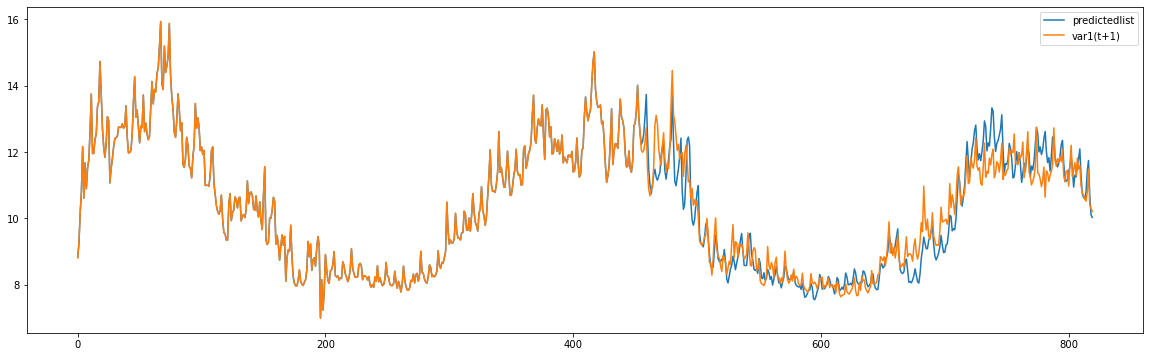

In [161]:
reframed[["predictedlist","var1(t+1)"]].plot(figsize=(20,6));

Text(0.5, 0, 'Time')

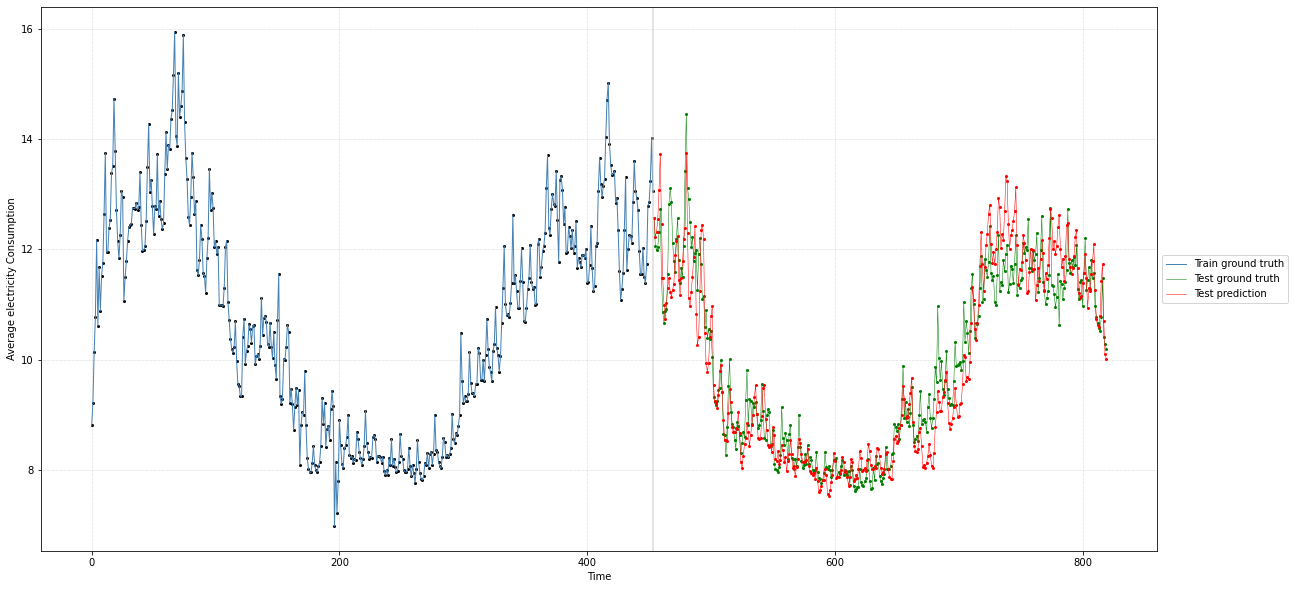

In [162]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 1, figsize=(20, 10), sharex=True)

train = reframed[:454]
axes.plot(train.index, train['var1(t+1)'], 'ko', markersize=2, )
axes.plot(train.index, train['var1(t+1)'], color='steelblue', lw=1,label='Train ground truth')

test = reframed[454:]
axes.plot(test.index, test['var1(t+1)'], 'go', markersize=2, )
axes.plot(test.index, test['var1(t+1)'], 'g', lw=0.5, label='Test ground truth')
axes.plot(test.index, test.predictedlist, color='red', lw=0.5, label='Test prediction')
axes.plot(test.index, test.predictedlist, 'ro', markersize=2, )

axes.axvline(train.index[-1], color='0.8', alpha=0.7)
axes.set_ylabel(f'Average electricity Consumption (kWh)')
axes.grid(ls=':', lw=0.5)
axes.legend(loc='center left', bbox_to_anchor=(1,0.5))
axes.set_xlabel('Time')

In [163]:
import numpy as np
from sklearn.metrics import mean_absolute_error


print(mean_absolute_error(y_true, pred_list))

0.4094623466046161


In [164]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_true, pred_list))

0.302326962947236


In [165]:
import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error

print("RMSE: ",mean_squared_error(y_true, pred_list))
print("MSE: ",mean_squared_error(y_true, pred_list, squared=False))
print("MAE: ",mean_absolute_error(y_true, pred_list))
print("MAPE: ",mean_absolute_percentage_error(y_true, pred_list))

RMSE:  0.302326962947236
MSE:  0.5498426710862263
MAE:  0.4094623466046161
MAPE:  0.03968090462084702
